### Package imports

In [15]:
# # Display plots inline and change default figure size
# %matplotlib inline

# Package imports
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import csv
from pandas_datareader import data as datard
import pandas as pd
from scipy.stats import norm
from random import randint
from datetime import datetime
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'datetime', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [44]:

def get_stock_dataframe(ticker , startDate , endDate):
  #Get the stock
  df = datard.DataReader(ticker, 'stooq', startDate, endDate)
  #Reverse the data frame
  df = df.iloc[::-1]
  return df

startDate = pd.to_datetime('2012-12-24')
endDate = pd.to_datetime('2021-12-24')
df = get_stock_dataframe('AAPL' , startDate , endDate)
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-24,16.076,16.1960,16.025,16.070,203181685
2012-12-26,16.034,16.0480,15.789,15.847,349355214
2012-12-27,15.864,15.9480,15.590,15.911,525785688
2012-12-28,15.763,15.8920,15.696,15.742,409321246
2012-12-31,15.757,16.5390,15.724,16.439,761875284
...,...,...,...,...,...
2021-12-17,169.930,173.4700,169.690,171.140,195923441
2021-12-20,168.280,170.5800,167.460,169.750,107499114
2021-12-21,171.555,173.2000,169.120,172.990,91185905


In [45]:
df.describe()

,Open,High,Low,Close,Volume
count,2267.000000,2267.000000,2267.000000,2267.000000,2.267000e+03
mean,50.157004,50.687993,49.645428,50.189978,1.951934e+08
std,39.703933,40.182650,39.240773,39.740966,1.488319e+08
min,12.054000,12.416000,11.966000,12.134000,4.099995e+07
25%,23.453500,23.672500,23.242000,23.537000,1.011901e+08
50%,35.735000,36.119000,35.406000,35.677000,1.445298e+08
75%,55.173500,55.515500,54.693000,55.029500,2.374365e+08
max,181.115000,182.130000,175.530000,179.450000,1.688039e+09


### Parameter Initialization [Please clarify using 20-days-segmentation or original-segmentation]

In [30]:
# # Set the data source
# #FILE_NAME = 'hk_price.txt'
# FILE_NAME = 'hk_price_100k.txt'

# # Check how many lines in the file
# DATA_ROWS_NUM = 100000

# # Catch the first several segments
# MAX_SEG_TO_CATCH = 340

# How many days per segment 
DAY_PER_SEG = 60

# How many days to save image for testing
DAY_PER_IMAGE = 30

# # Consider OPEN price or not
# ADD_OPEN_PRICE = False

# '''Decide to use segmation method 1 or method 2'''
# USE_20_DAYS_SEG = True



### Data Initialization

In [25]:
data = df.values
dataset = []

for i in range(len(data)):
    dataset.append(dict(date = str(df.index[i]).split(' ')[0] , open = data[i][0] , high = data[i][1] , low = data[i][2] , close = data[i][3]))


In [ ]:
# for i in range(0 , len(df) , 1):
#     data_version = df.iloc[i:i + DAY_PER_IMAGE, ]
#     pylab.rcParams['figure.figsize'] = (15, 15)   # Change the size of plots
#     data_version['Open'].plot(grid = True) # P

#     name=str(df.index[i]).split(' ')[0] + "-" + str(df.index[i+30]).split(' ')[0]
#     print(name)
#     names="./test/has/" + name + "_graph_ " + str(DAY_PER_IMAGE) + "_day.png"
#     plt.savefig(names)

In [ ]:

# for abc in range(200,300):
#     try:
#         from scipy.stats import norm
#         log_returns = np.log(1 + df['Close'])
#         u = log_returns.mean()
#         var = log_returns.var()
#         drift = -0.00002
#         stdev = 0.0082497
#         x = np.random.rand(10, 2)
#         Z = norm.ppf(np.random.rand(10,2))

#         iterations = 1
#         R1=randint(1,2)
#         R2=randint(1,3)
#         R3=randint(1,2)
#         R4=randint(1,2)
#         R5=randint(1,2)
#         R6=randint(1,2)
#         R7=randint(1,2)
#         R8=randint(1,2)
#         R9=randint(1,2)
#         R10=randint(1,3)
#         R11=randint(1,2)
#         t_intervals = 30-R1-R2-R3-R4-R5-R6-R7-R8-R9-R10-R11
#         if t_intervals < 0:
#             t_intervals=2
#         daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#         S0 = df['Close'].iloc[-1]
#         price_list = np.zeros_like(daily_returns)
#         price_list[0] = S0
        
#         for t in range(1, t_intervals):
#             price_list[t] = price_list[t - 1] * daily_returns[t]

#         lst=[]
#         for i in price_list:
#             lst.append(float(i))

#         A=(0.03 - (0.02)) * np.random.random_sample() + 0.02
#         X=(0.01 - (0.01)) * np.random.random_sample() + 0.01
        
#         multiplicateur=(2 - (1.3)) * np.random.random_sample() + 1.3
        
#         def list_generation(valeur_base=int(S0),gap_day=R1,A=0.02):
#             alist=[]
#             R1a=[]
#             cap=1
#             for i in range(0,(gap_day-1)):
#                 ca=((A - (-0.005)) * np.random.random_sample() + (-0.005))+1
#                 cap=ca
#                 R1a.append(ca)
#             R1a.append(A/cap+1)

#             for i in range(0,gap_day):
#                 rf=valeur_base*(R1a[i])
#                 alist.append(rf)
#             return alist
        
#         a=list_generation(valeur_base=lst[-1],gap_day=R1,A=A)
#         print(A)
#         # print(a)
#         b=list_generation(valeur_base=a[-1],gap_day=R2,A=X)
#         # print(b)
#         c=list_generation(valeur_base=b[-1],gap_day=R3,A=-A)
#         # print(c)
#         d=list_generation(valeur_base=c[-1],gap_day=R4,A=X)
#         # print(d)
#         e=list_generation(valeur_base=d[-1],gap_day=R5,A=multiplicateur*A)
#         # print(e)
#         f=list_generation(valeur_base=e[-1],gap_day=R6,A=X)
#         # print(f)
#         g=list_generation(valeur_base=f[-1],gap_day=R7,A=-multiplicateur*A)
#         # print(g)
#         h=list_generation(valeur_base=g[-1],gap_day=R8,A=-X*multiplicateur*(1+A)**10)
        
#         # print(h)
#         i=list_generation(valeur_base=h[-1],gap_day=R9,A=A)
#         # print(i)
#         j=list_generation(valeur_base=i[-1],gap_day=R10,A=X)
#         # print(j)
#         k=list_generation(valeur_base=j[-1],gap_day=R11,A=-A*(1+A)**5)
#         # print(k)
#         simulation_lst=lst+a+b+c+d+e+f+g+h+i+j+k
        
#         df1 = pd.DataFrame(simulation_lst, columns =['pred']) 

#         pylab.rcParams['figure.figsize'] = (15, 15)   # Change the size of plots
#         df1["pred"].plot(grid = True) # 
        
#         name=str(abc)
#         names="train/has/"+name+"_graph_30_day.png"
#         plt.savefig(names)
#         plt.clf()
#     except:
#         abc=abc-1
#         pass

<!-- for i in range(0 , len(df) , 2):
    data_version = df.iloc[i:i + DAY_PER_IMAGE, ]
    pylab.rcParams['figure.figsize'] = (15, 15)   # Change the size of plots
    data_version['Open'].plot(grid = True) # P

    name=str(df.index[i]).split(' ')[0] + "-" + str(df.index[i+30]).split(' ')[0]
    print(name)
    names="./test/has/" + name + "_graph_ " + str(DAY_PER_IMAGE) + "_day.png"
    plt.savefig(names) -->

### Segmentation (method 2): Crop the segment by given date frame, e.g. 20 days

In [8]:
data_count_per_seg = 0

# Create a limited number of lists of nested lists. The inner lists contain all datarow from a segment
X_seg = []
X = []

for row in dataset:
    
    # Create a new segment if a segment is fully filled
    if(data_count_per_seg >= DAY_PER_SEG):
        X.append(X_seg)
        data_count_per_seg = 0
        X_seg = []

    # Append row to its segment
    X_seg.append(row)
    data_count_per_seg = data_count_per_seg + 1


### Figure plotting

In [9]:
def findMaxInSegment(seg):
    max_price = 0
    max_ind = 0
    for ind, row in enumerate(seg):
        if (float(row['close']) > max_price):
            max_price = float(row['close'])
            max_ind = ind
    return (max_ind, max_price)

In [10]:
def getSlope(x1, y1, x2, y2, isABS):
    if (x2 - x1) != 0:
        slope = (y2 - y1)/(x2 - x1)
        if (slope > 0) or (not isABS):
            return slope
        else:
            return slope * (-1)
    else:
        raise ValueError('Zero Division')

In [11]:
def findUpperBoundGivenSegment(seg, max_ind, max_price):

    min_slope = 1
    # The second point who underpin the upper bound
    sec_ind = 0
    sec_price = 0
    
    for ind, row in enumerate(seg):
        price = float(row['close'])
        # Different from the max point
        if(ind != max_ind):
            ABSslope = getSlope(max_ind, max_price, ind, price, True)
            # Flatter slope found!!
            if(min_slope > ABSslope):
                sec_ind = ind
                sec_price = price
                min_slope = ABSslope
                
    return (sec_ind, sec_price)

In [12]:
def findLineViaTwoPoints(x1,y1,x2,y2):
    slope = getSlope(x1,y1,x2,y2, False)
    y0 = y1 - x1 * slope
    y3 = (19 - x1) * slope + y1
    return ([0,19], [y0,y3])

In [13]:
def plotBySegment(seg, ind):
    y = []
    length = len(seg)
    if(length > 0):
        date = seg[length-1]['dat'] + " to " + seg[0]['dat']
    else:
        date = "NA"
    
    # for each data, records its open price and close price
    for row in seg:
        if ADD_OPEN_PRICE:
            y.append(row['open'])
        y.append(row['close'])
        

    
    (max_ind, max_price) = findMaxInSegment(seg)
    (sec_ind, sec_price) = findUpperBoundGivenSegment(seg, max_ind, max_price)
    
    (line_x, line_y) = findLineViaTwoPoints(max_ind,max_price,sec_ind,sec_price)
    
    # Plot the figure for each segment
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("#" + str(ind) + " | " + date + " | num of data: " + str(length))
    ax.plot(y)
    
    #
    ax.plot(line_x, line_y)
        

In [14]:
def plotCandleBySegment(seg, ind):
    y = []
    length = len(seg)
    if(length > 0):
        date = seg[length-1]['date'] + " to " + seg[0]['date']
    else:
        date = "NA"
    
    # for each data, records its open price and close price
    for i, row in enumerate(seg): # (close, high, low, open)
        y.append((i, float(row['open']), float(row['high']), float(row['low']), float(row['close'])))

    
    # Plot the figure for each segment
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("#" + str(ind) + " | " + date + " | num of data: " + str(length))
    #ax.plot(y)
    candlestick_ohlc(ax, y, width=0.6)
    plt.show()


### Figure Printing

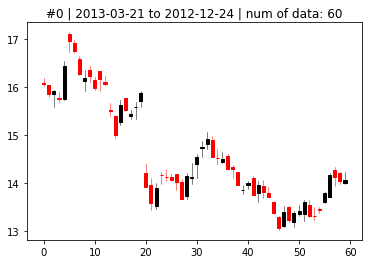

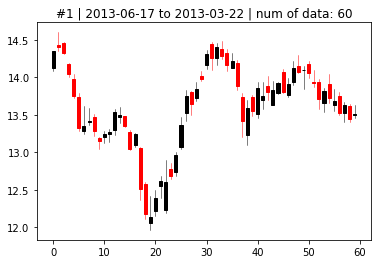

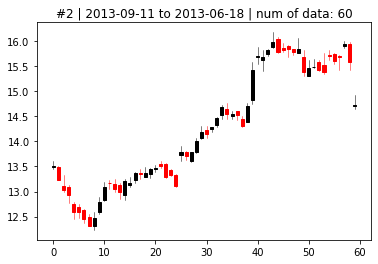

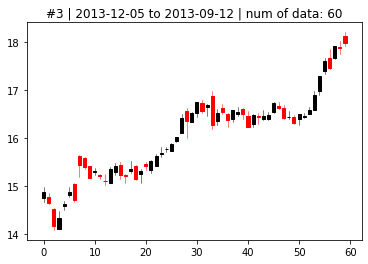

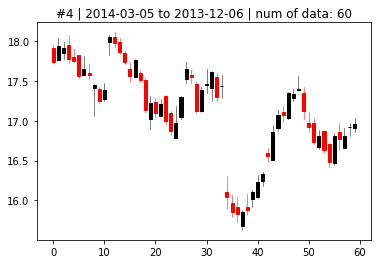

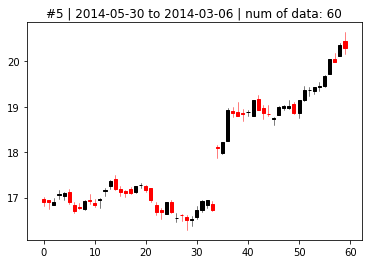

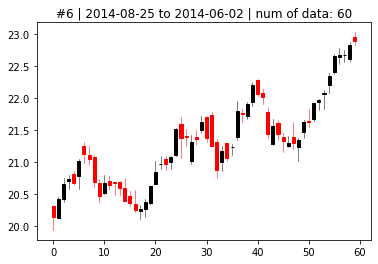

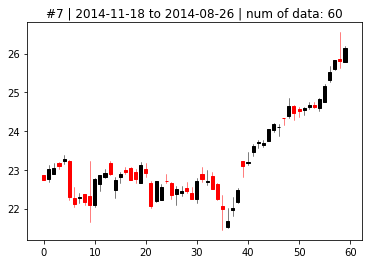

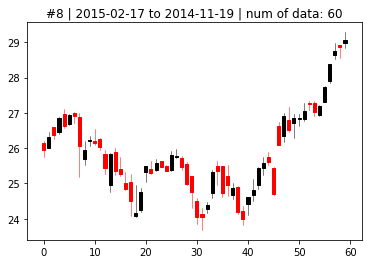

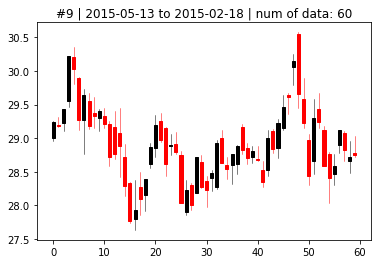

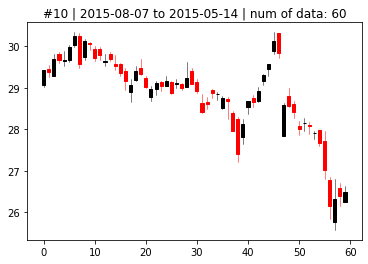

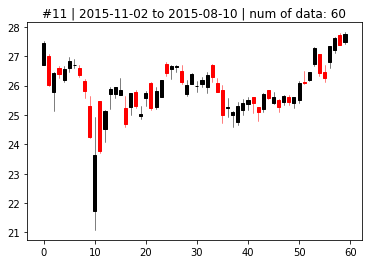

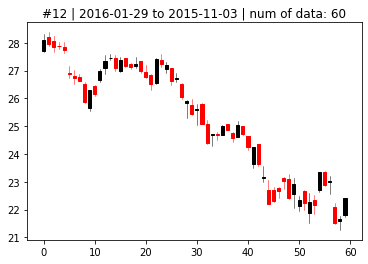

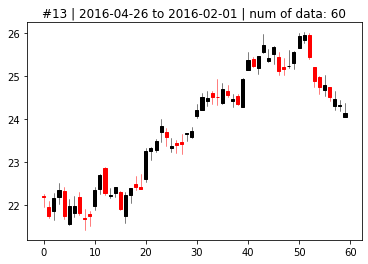

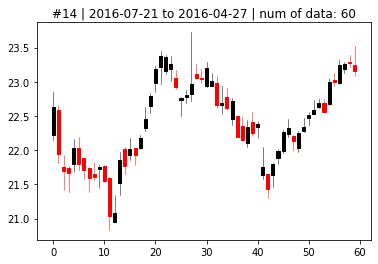

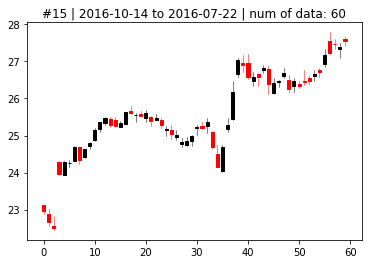

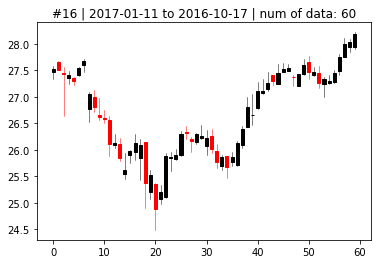

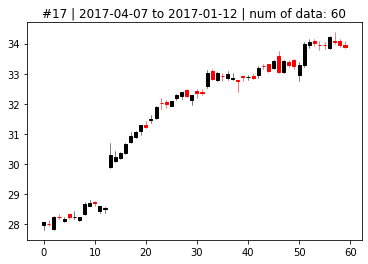

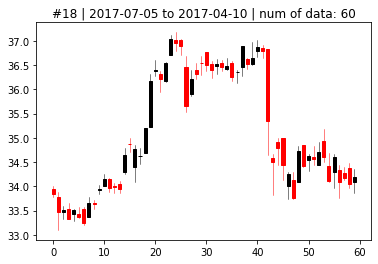

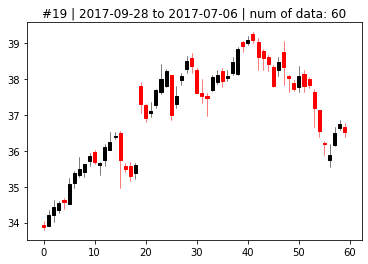

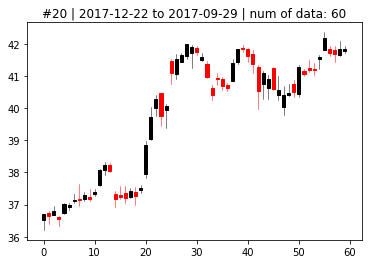

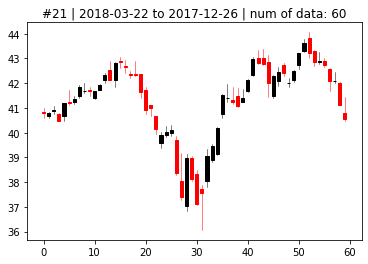

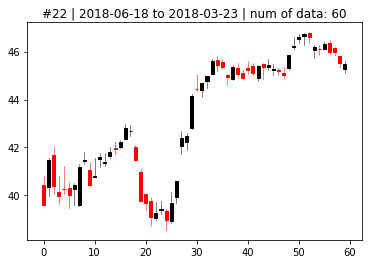

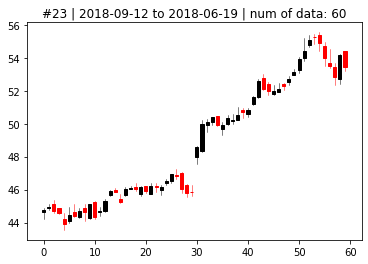

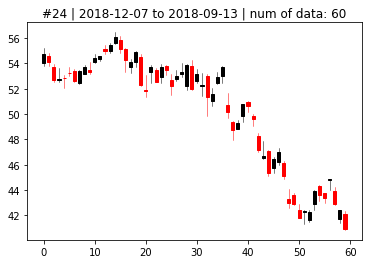

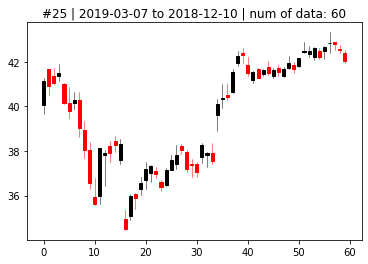

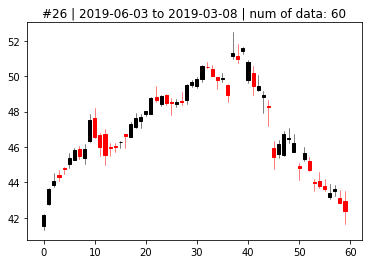

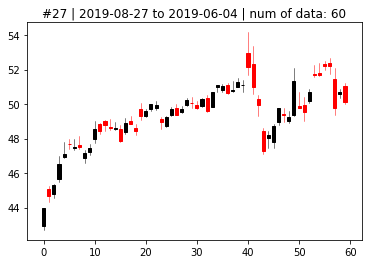

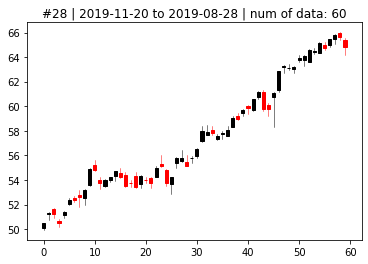

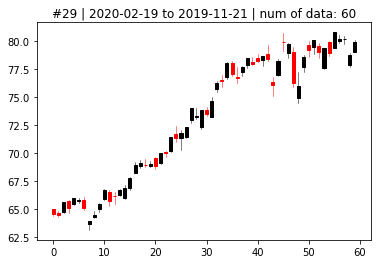

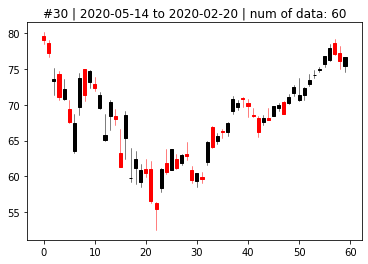

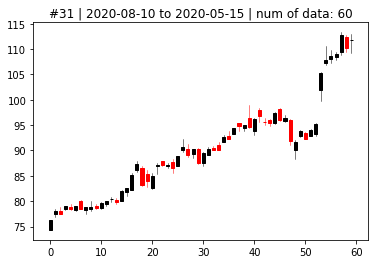

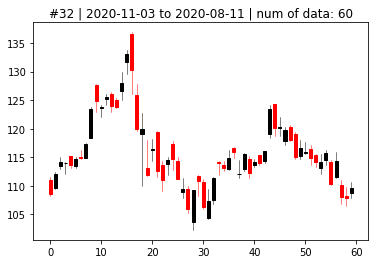

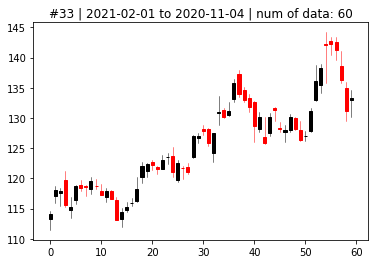

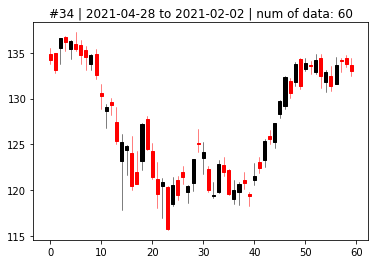

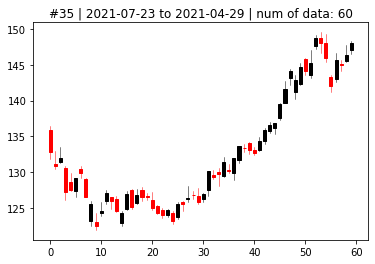

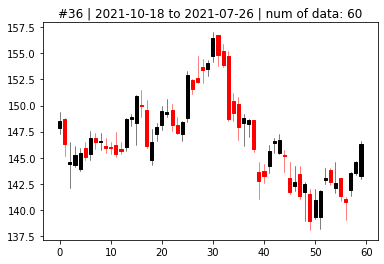

In [88]:
for ind, seg in enumerate(X):
    if(len(seg) == DAY_PER_SEG):
        #plotBySegment(seg, ind)
        plotCandleBySegment(seg, ind)
      

### Collect valid data

In [83]:
# Read in labels from external file
with open('label.txt') as f:
    labels = f.readlines()
    
labels = [c.strip() for c in labels]  # Remove whitespace characters like `\n` at the end of each line
print(labels)

FileNotFoundError: [Errno 2] No such file or directory: 'label.txt'

In [84]:
# Create valid data matrix
X_valid = []

In [22]:
# Assign label to designated row
id = 0

for ind, seg in enumerate(X_seg):
    if(len(seg) == DAY_PER_SEG):
        # Set the label of each day_dict
        label = 0    

        if(str(ind) in labels):
            label = 1
        
        for index, day_dict in enumerate(seg):
            seg[index]["label"] = label
            seg[index]["id"] = id
        
        X_valid.append(seg)
        
        id += 1

In [25]:
with open('output.csv', 'w') as csvfile:
    fieldnames = ['id', 'dat', 'open', 'close', 'high', 'low', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    # writer.writerow({'first_name': 'Baked', 'last_name': 'Beans'})
    for ind, seg in enumerate(X_seg_valid):
        for index, day_dict in enumerate(seg):
            writer.writerow({'id': seg[index]['id'], 'dat': seg[index]['dat'], 'open': seg[index]['open'], 'close': seg[index]['close'], 'high': seg[index]['high'], 'low': seg[index]['low'], 'label': seg[index]['label']})